<a href="https://colab.research.google.com/github/Sandwhaletree/Mai_Finlab/blob/main/%E8%82%A1%E7%A5%A8%E4%BA%A4%E6%98%93%E7%AD%96%E7%95%A5/001_%E5%8F%B0%E8%82%A1_MACD%E4%BA%A4%E6%98%93%E7%AD%96%E7%95%A5_0713.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_datareader yfinance matplotlib seaborn

In [62]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#### Python股票回測使用 MACD畫出買賣點
* [Python股票回測使用 MACD畫出買賣點](https://smilehsu.cc/2020/06/2415)

In [ ]:
# for colab 不想用 colab請省略
#下面的程式執行後可以將 csv檔上傳到 colab上讀取
'''
from google.colab import files
upload= files.upload()
'''

'''
df=pd.read_csv('BDO-2019-2020-06-24.csv')
df=df.set_index(pd.DatetimeIndex(df['DATE'].values))
'''

In [84]:
#股票代號
stock_no='00893.TW'
#起始日期
start_date='2020-01-01'
#下載資料
df=yf.download(stock_no,start=start_date)

[*********************100%***********************]  1 of 1 completed


In [85]:
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-20,17.379999,17.400000,17.330000,17.360001,17.360001,13280060
2023-06-21,17.660000,17.709999,17.660000,17.709999,17.709999,23202719
2023-06-26,17.120001,17.139999,16.879999,16.910000,16.910000,21635026
2023-06-27,16.549999,16.580000,16.490000,16.549999,16.549999,38008241
2023-06-28,16.750000,16.850000,16.750000,16.809999,16.809999,14184098
2023-06-29,17.080000,17.129999,17.080000,17.080000,17.080000,14128940
2023-06-30,17.080000,17.190001,17.070000,17.190001,17.190001,12446015
2023-07-03,17.530001,17.660000,17.530001,17.650000,17.650000,21551971
2023-07-04,17.850000,17.920000,17.809999,17.889999,17.889999,17605076


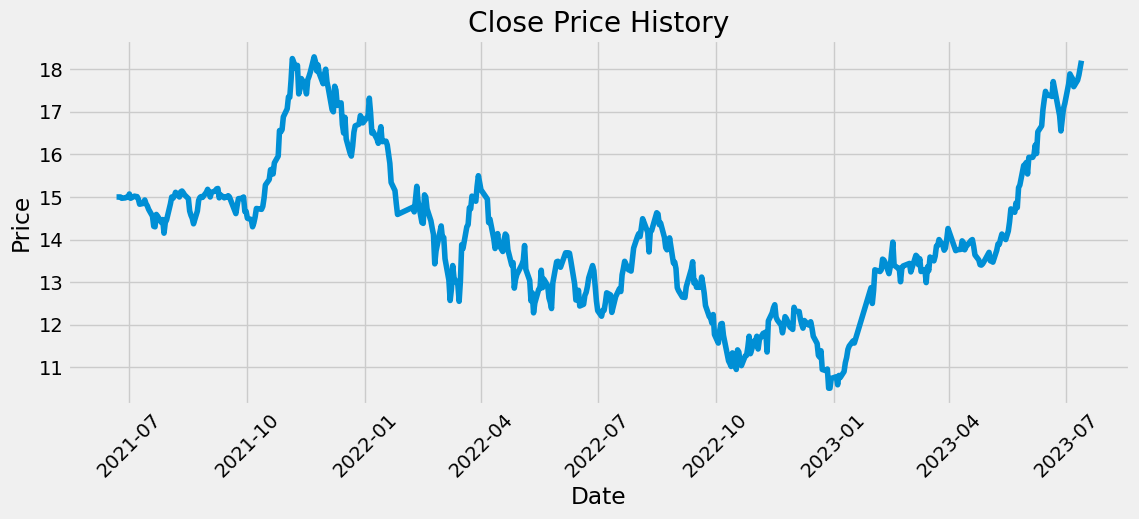

In [86]:
#畫出歷史股價走勢圖
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
#字斜45度角
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [87]:
#動態查股票
import plotly.graph_objs as go

# Create a trace for the close price
trace_close = go.Scatter(
    x = df.index,
    y = df['Close'],
    mode = 'lines',
    name = 'Close Price'
)

data = [trace_close]

# Create the layout
layout = go.Layout(
    title='Close Price History',
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Price',
    )
)

# Create the figure and add the trace
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()

In [88]:
#計算MACD and Signal line indicators

#計算短期指數移動平均線
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
#計算長期指數移動平均線
LongEMA=df.Close.ewm(span=26,adjust=False).mean()
#Calculat the MACD line
MACD=ShortEMA-LongEMA
#Calculat the Signal line
signal=MACD.ewm(span=9,adjust=False).mean()

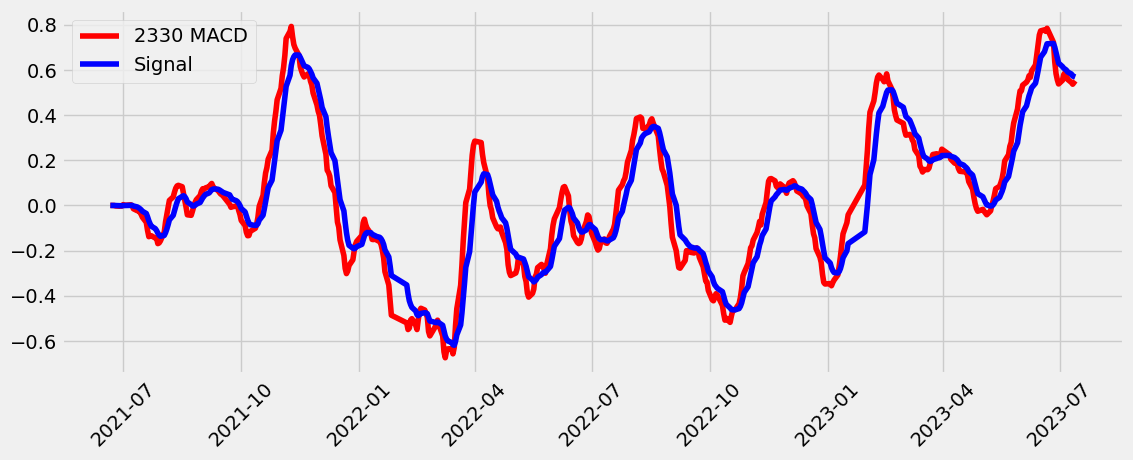

In [89]:
#畫圖
plt.figure(figsize=(12.2,4.5))
plt.xticks(rotation=45)
plt.plot(df.index , MACD, label='2330 MACD', color='red')
plt.plot(df.index , signal, label='Signal', color='Blue')
plt.legend(loc='upper left')
plt.show()

In [90]:
import plotly.graph_objs as go

# Create a trace for the MACD
trace_macd = go.Scatter(
    x = df.index,
    y = MACD,
    mode = 'lines',
    name = '2330_MACD',
    line = dict(color='red')
)

# Create a trace for the signal line
trace_signal = go.Scatter(
    x = df.index,
    y = signal,
    mode = 'lines',
    name = 'Signal Line',
    line = dict(color='blue')
)

data = [trace_macd, trace_signal]

# Create the layout
layout = go.Layout(
    title='MACD and Signal Line',
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Value',
    )
)

# Create the figure and add the traces
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


In [91]:
df['MACD']=MACD
df['Signal Line']=signal
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2021-06-21,15.00,15.00,15.00,15.00,15.00,0,0.000000,0.000000
2021-06-22,15.00,15.00,15.00,15.00,15.00,0,0.000000,0.000000
2021-06-23,15.00,15.00,15.00,15.00,15.00,0,0.000000,0.000000
2021-06-24,15.00,15.00,15.00,15.00,15.00,0,0.000000,0.000000
2021-06-25,14.97,14.97,14.97,14.97,14.97,0,-0.002393,-0.000479


In [92]:
# create a funtion to signal when to buy and sell an asset
#買賣點的判斷，這只是一個示範，並不能實際用於買賣股票!!!
def Buy_Sell(signal):
  Buy=[]
  Sell=[]
  flag=-1

  for i in range(0,len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag !=1:
        Buy.append(signal['Close'][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag !=0:
        Sell.append(signal['Close'][i])
        flag=0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return(Buy,Sell)

In [93]:
a=Buy_Sell(df)
df['Buy_Signal_Price']=a[0]
df['Sell_Signal_Price']=a[1]

In [94]:
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2023-06-20,17.379999,17.400000,17.330000,17.360001,17.360001,13280060,0.770742,0.698533,NaN,NaN
2023-06-21,17.660000,17.709999,17.660000,17.709999,17.709999,23202719,0.784531,0.715733,NaN,NaN
2023-06-26,17.120001,17.139999,16.879999,16.910000,16.910000,21635026,0.722577,0.717101,NaN,NaN
2023-06-27,16.549999,16.580000,16.490000,16.549999,16.549999,38008241,0.637085,0.701098,NaN,16.549999
2023-06-28,16.750000,16.850000,16.750000,16.809999,16.809999,14184098,0.583584,0.677595,NaN,NaN
2023-06-29,17.080000,17.129999,17.080000,17.080000,17.080000,14128940,0.556556,0.653387,NaN,NaN
2023-06-30,17.080000,17.190001,17.070000,17.190001,17.190001,12446015,0.537812,0.630272,NaN,NaN
2023-07-03,17.530001,17.660000,17.530001,17.650000,17.650000,21551971,0.553693,0.614956,NaN,NaN
2023-07-04,17.850000,17.920000,17.809999,17.889999,17.889999,17605076,0.578971,0.607759,NaN,NaN


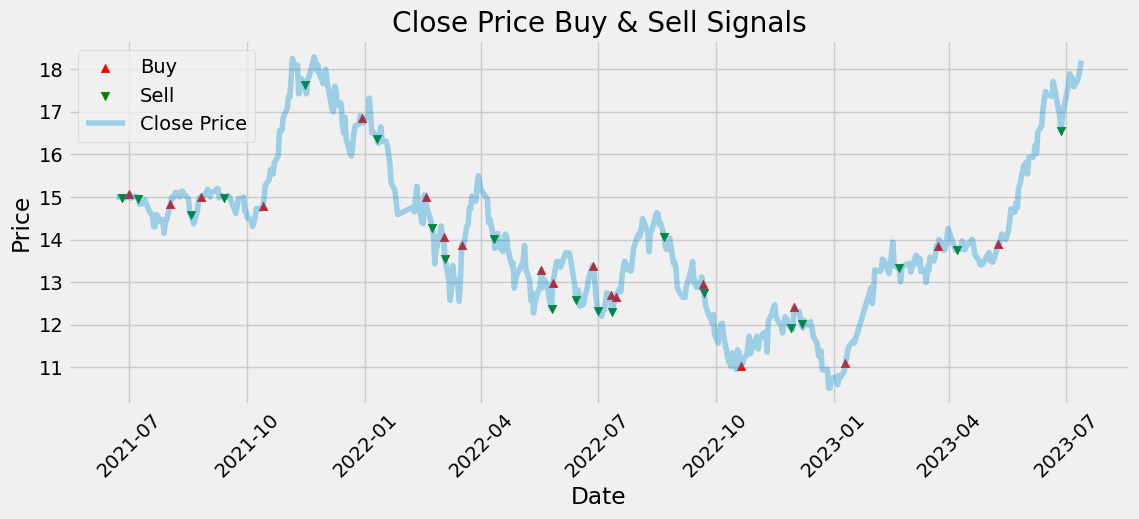

In [95]:
#Visually show the stock buy and sell signal
plt.figure(figsize=(12.2,4.5))
# ^ = shift + 6
plt.scatter(df.index,df['Buy_Signal_Price'],color='red', label='Buy',marker='^',alpha=1)
#小寫的v
plt.scatter(df.index,df['Sell_Signal_Price'],color='green', label='Sell',marker='v',alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
#字斜45度角
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [96]:
import plotly.graph_objs as go

# Create a trace for the close price
trace_close = go.Scatter(
    x = df.index,
    y = df['Close'],
    mode = 'lines',
    name = 'Close Price',
    line = dict(color='purple', width=1)
)

# Create a trace for the buy signal prices
trace_buy = go.Scatter(
    x = df.index,
    y = df['Buy_Signal_Price'],
    mode = 'markers',
    name = 'Buy Signal',
    marker = dict(color='red', size=8, symbol='triangle-up')
)

# Create a trace for the sell signal prices
trace_sell = go.Scatter(
    x = df.index,
    y = df['Sell_Signal_Price'],
    mode = 'markers',
    name = 'Sell Signal',
    marker = dict(color='green', size=8, symbol='triangle-down')
)

data = [trace_close, trace_buy, trace_sell]

# Create the layout
layout = go.Layout(
    title='Close Price Buy & Sell Signals',
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Price',
    )
)

# Create the figure and add the traces
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


#### CHAT教學

In [6]:
#獲取"0050.TW ETF價格數據

# Download the data
df = yf.download('0050.TW')

# Display the first few rows of the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,60.009998,60.009998,60.009998,60.009998,60.009998,0
2008-01-03,58.889999,58.889999,58.889999,58.889999,58.889999,0
2008-01-04,59.009998,59.009998,59.009998,59.009998,59.009998,0
2008-01-07,56.389999,56.389999,56.389999,56.389999,56.389999,0
2008-01-08,56.980000,56.980000,56.980000,56.980000,56.980000,0


In [7]:
#計算報酬率
df['Return'] = df['Adj Close'].pct_change()

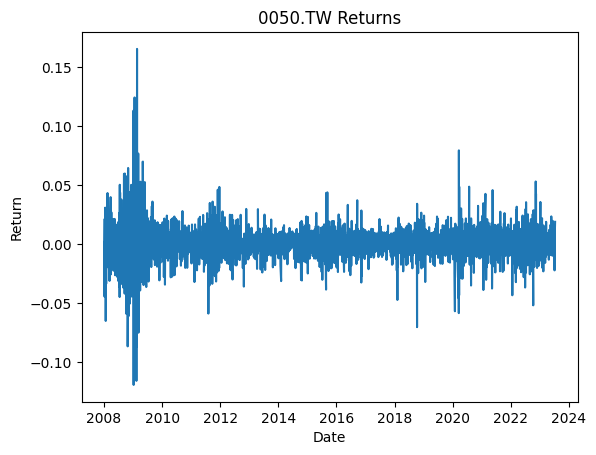

In [8]:
sns.lineplot(data=df['Return'])
plt.title('0050.TW Returns')
plt.show()

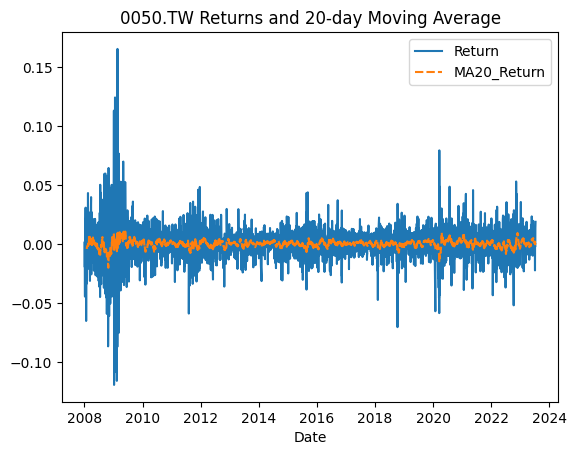

In [9]:
df['MA20_Return'] = df['Return'].rolling(window=20).mean()
sns.lineplot(data=df[['Return', 'MA20_Return']])
plt.title('0050.TW Returns and 20-day Moving Average')
plt.show()

#### 比較三個股票的價格數據

In [10]:
stocks = ["00893.TW", "00881.TW", "0050.TW"]
data = yf.download(stocks, start="2022-01-01", end="2023-12-31")

[*********************100%***********************]  3 of 3 completed


In [11]:
returns = data['Adj Close'].pct_change()

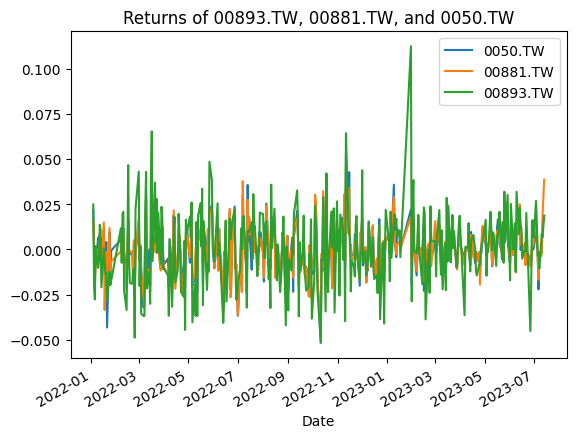

In [12]:
returns.plot()
plt.title('Returns of 00893.TW, 00881.TW, and 0050.TW')
plt.show()

In [13]:
!pip install plotly

In [14]:
import plotly.graph_objs as go

# Create a trace for each stock
traces = [go.Scatter(
    x = returns.index,
    y = returns[stock],
    mode = 'lines',
    name = stock
) for stock in stocks]

# Create a layout
layout = go.Layout(
    title='Returns of 00893.TW, 00881.TW, and 0050.TW',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Return'),
)

# Create a Figure and add the traces
fig = go.Figure(data=traces, layout=layout)

# Plot the figure
fig.show()

#### 過macd打造判斷買賣進出點,我想針對上面3個股票預測

In [30]:
import numpy as np

In [15]:
stocks = ["00893.TW", "00881.TW", "0050.TW"]
data = yf.download(stocks, start="2022-01-01", end="2023-12-31")

[*********************100%***********************]  3 of 3 completed


In [16]:
# Calculate the MACD and Signal line indicators
# Calculate the Short Term Exponential Moving Average
ShortEMA = data['Close'].ewm(span=12, adjust=False).mean() #AKA Fast moving average
# Calculate the Long Term Exponential Moving Average
LongEMA = data['Close'].ewm(span=26, adjust=False).mean() #AKA Slow moving average
# Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()


In [33]:
# Create a new DataFrame to store the MACD and signal line data
df_macd = pd.DataFrame(index=data.index)

# Calculate the MACD and signal line for each stock
for stock in stocks:
    # Calculate the Short Term Exponential Moving Average
    ShortEMA = data['Close', stock].ewm(span=12, adjust=False).mean() #AKA Fast moving average
    # Calculate the Long Term Exponential Moving Average
    LongEMA = data['Close', stock].ewm(span=26, adjust=False).mean() #AKA Slow moving average
    # Calculate the Moving Average Convergence/Divergence (MACD)
    MACD = ShortEMA - LongEMA
    # Calculate the signal line
    signal = MACD.ewm(span=9, adjust=False).mean()

    # Store the MACD and signal line data
    df_macd['MACD_'+stock] = MACD
    df_macd['Signal_'+stock] = signal
    df_macd['Close_'+stock] = data['Close', stock] #包含收盤價

In [27]:
signal

Date
2022-01-03    0.000000
2022-01-04    0.051054
2022-01-05    0.126529
2022-01-06    0.190730
2022-01-07    0.223323
                ...   
2023-07-06    1.718578
2023-07-07    1.578699
2023-07-10    1.421597
2023-07-11    1.286615
2023-07-13    1.210326
Name: (Close, 0050.TW), Length: 367, dtype: float64

In [35]:
# Create a function to signal when to buy and sell an asset
def buy_sell(df_macd, stock):
    Buy = []
    Sell = []
    flag = -1

    for i in range(0, len(df_macd)):
        if df_macd['MACD_'+stock][i] > df_macd['Signal_'+stock][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(df_macd['Close_'+stock][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif df_macd['MACD_'+stock][i] < df_macd['Signal_'+stock][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(df_macd['Close_'+stock][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)

    return (Buy, Sell)

# Create buy and sell columns for each stock
for stock in stocks:
    df_macd['Buy_Signal_Price_'+stock], df_macd['Sell_Signal_Price_'+stock] = buy_sell(df_macd, stock)

In [36]:
df_macd

,MACD_00893.TW,Signal_00893.TW,Close_00893.TW,MACD_00881.TW,Signal_00881.TW,Close_00881.TW,MACD_0050.TW,Signal_0050.TW,Close_0050.TW,Buy_Signal_Price_00893.TW,Sell_Signal_Price_00893.TW,Buy_Signal_Price_00881.TW,Sell_Signal_Price_00881.TW,Buy_Signal_Price_0050.TW,Sell_Signal_Price_0050.TW
Date,,,,,,,,,,,,,,,
2022-01-03,0.000000,0.000000,16.900000,0.000000,0.000000,18.969999,0.000000,0.000000,146.399994,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,0.033504,0.006701,17.320000,0.023134,0.004627,19.260000,0.255272,0.051054,149.600006,17.32,NaN,19.26,NaN,149.600006,NaN
2022-01-05,0.031452,0.011651,16.969999,0.045782,0.012858,19.320000,0.428430,0.126529,149.300003,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,-0.008007,0.007719,16.500000,0.038274,0.017941,19.010000,0.447531,0.190730,147.899994,NaN,16.5,NaN,NaN,NaN,NaN
2022-01-07,-0.036438,-0.001112,16.530001,0.017597,0.017872,18.830000,0.353694,0.223323,146.600006,NaN,NaN,NaN,18.83,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06,0.583306,0.599610,17.780001,0.312558,0.346042,16.930000,1.267351,1.718578,127.900002,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-07,0.558301,0.591348,17.590000,0.282160,0.333266,16.840000,1.019181,1.578699,127.699997,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-10,0.544313,0.581941,17.740000,0.251140,0.316841,16.790001,0.793188,1.421597,127.449997,NaN,NaN,NaN,NaN,NaN,NaN


#### 過macd打造判斷買賣進出點,個股判斷

In [52]:
df_macd = pd.DataFrame()

In [55]:
# Specify the stock you want to analyze
stocks = ["00893.TW"]
data = yf.download(stocks, start="2022-01-01", end="2023-12-31")

# Calculate the MACD, signal line, and close price for the stock
for stock in stocks:
    # Calculate the Short Term Exponential Moving Average
    ShortEMA = data['Close'].ewm(span=12, adjust=False).mean() #AKA Fast moving average
    # Calculate the Long Term Exponential Moving Average
    LongEMA = data['Close'].ewm(span=26, adjust=False).mean() #AKA Slow moving average
    # Calculate the Moving Average Convergence/Divergence (MACD)
    MACD = ShortEMA - LongEMA
    # Calculate the signal line
    signal = MACD.ewm(span=9, adjust=False).mean()

    # Store the MACD, signal line, and close price data
    df_macd['MACD_' + stock] = MACD
    df_macd['Signal_' + stock] = signal
    df_macd['Close_' + stock] = data['Close']

# Create buy and sell signal for the stock
df_macd['Buy_Signal_Price'], df_macd['Sell_Signal_Price'] = buy_sell(df_macd, stock)


[*********************100%***********************]  1 of 1 completed


In [56]:
df_macd

,MACD_00893.TW,Signal_00893.TW,Close_00893.TW,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2022-01-03,0.000000,0.000000,16.900000,NaN,NaN
2022-01-04,0.033504,0.006701,17.320000,17.32,NaN
2022-01-05,0.031452,0.011651,16.969999,NaN,NaN
2022-01-06,-0.008007,0.007719,16.500000,NaN,16.5
2022-01-07,-0.036438,-0.001112,16.530001,NaN,NaN
...,...,...,...,...,...
2023-07-06,0.583306,0.599610,17.780001,NaN,NaN
2023-07-07,0.558301,0.591348,17.590000,NaN,NaN
2023-07-10,0.544313,0.581941,17.740000,NaN,NaN


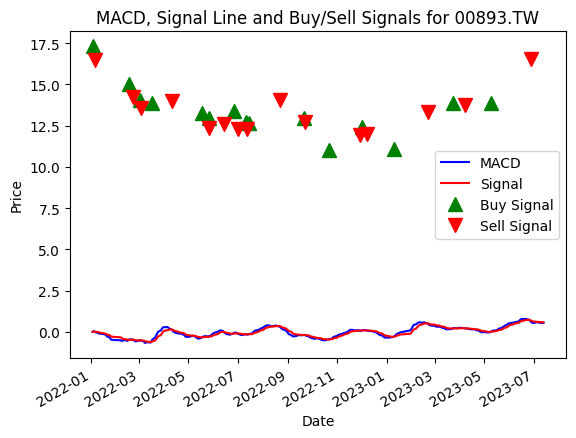

In [57]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot MACD and signal line
df_macd['MACD_' + stock].plot(ax=ax, color='blue', label='MACD')
df_macd['Signal_' + stock].plot(ax=ax, color='red', label='Signal')

# Plot buy signals
ax.plot(df_macd[df_macd['Buy_Signal_Price'].notna()].index,
        df_macd['Buy_Signal_Price'][df_macd['Buy_Signal_Price'].notna()],
        '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
ax.plot(df_macd[df_macd['Sell_Signal_Price'].notna()].index,
        df_macd['Sell_Signal_Price'][df_macd['Sell_Signal_Price'].notna()],
        'v', markersize=10, color='r', label='Sell Signal')

# Set the title and labels
ax.set_title('MACD, Signal Line and Buy/Sell Signals for ' + stock)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [58]:
# 計算買入和賣出訊號的價格
buy_prices = df_macd['Buy_Signal_Price'][df_macd['Buy_Signal_Price'].notna()]
sell_prices = df_macd['Sell_Signal_Price'][df_macd['Sell_Signal_Price'].notna()]

# 確保買賣訊號的數量相同
if len(buy_prices) > len(sell_prices):
    buy_prices = buy_prices.iloc[:len(sell_prices)]
elif len(sell_prices) > len(buy_prices):
    sell_prices = sell_prices.iloc[:len(buy_prices)]

# 計算報酬
returns = (sell_prices.values - buy_prices.values) / buy_prices.values

# 計算總報酬
total_return = np.prod(1 + returns) - 1

print(f'Total return: {total_return * 100:.2f}%')

Total return: 15.01%


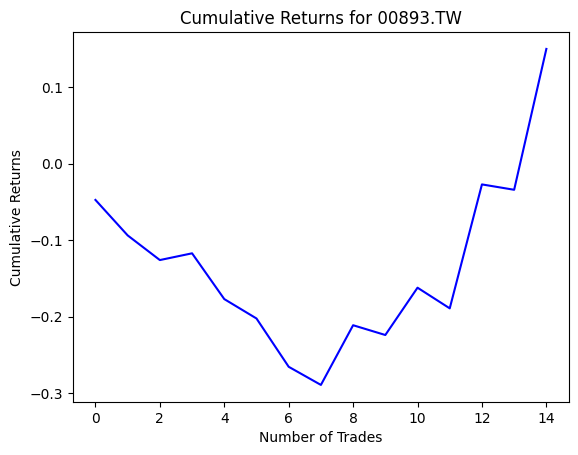

In [60]:
import pandas as pd

# Calculate the cumulative returns
cumulative_returns = pd.Series((1 + returns).cumprod() - 1)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the cumulative returns
cumulative_returns.plot(ax=ax, color='blue')

# Set the title and labels
ax.set_title('Cumulative Returns for ' + stock)
ax.set_xlabel('Number of Trades')
ax.set_ylabel('Cumulative Returns')

# Show the plot
plt.show()

In [61]:
df_macd.to_csv("df_macd.csv")